In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [3]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['selling_price'].plot(kind='hist', bins=20, title='selling_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['km_driven'].plot(kind='hist', bins=20, title='km_driven')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='year', y='selling_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='selling_price', y='km_driven', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['selling_price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('selling_price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['km_driven']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('km_driven')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['selling_price'].plot(kind='line', figsize=(8, 4), title='selling_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['km_driven'].plot(kind='line', figsize=(8, 4), title='km_driven')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
df.duplicated().sum()

np.int64(763)

In [5]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [6]:
df.isna().mean()*100

,0
name,0.0
year,0.0
selling_price,0.0
km_driven,0.0
fuel,0.0
seller_type,0.0
transmission,0.0
owner,0.0


In [7]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3861,Datsun GO T Petrol,2015,310000,32686,Petrol,Dealer,Manual,First Owner
4021,Maruti 800 AC Uniq,2005,65000,70000,Petrol,Individual,Manual,Second Owner
3110,Mahindra Scorpio BSIV,2018,707000,60000,Diesel,Individual,Manual,First Owner
1414,Skoda Superb Elegance 2.0 TDI CR AT,2011,450000,235000,Diesel,Individual,Automatic,First Owner
673,Maruti Alto K10 LXI,2015,138000,120000,Petrol,Individual,Manual,Fourth & Above Owner
3809,Skoda Superb Ambition 2.0 TDI CR AT,2013,675000,88000,Diesel,Dealer,Automatic,First Owner
3086,Maruti Ertiga VDI,2013,250999,80000,Diesel,Individual,Manual,First Owner
909,Maruti S-Cross Zeta DDiS 200 SH,2015,750000,45974,Diesel,Trustmark Dealer,Manual,First Owner
2671,Maruti Swift 1.3 DLX,2015,270000,40000,Diesel,Individual,Manual,Second Owner
2164,Hyundai Verna 1.6 SX CRDi (O),2013,430000,100000,Diesel,Individual,Manual,Second Owner


In [8]:
# Drop duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.duplicated().sum()   # Should return 0

np.int64(0)

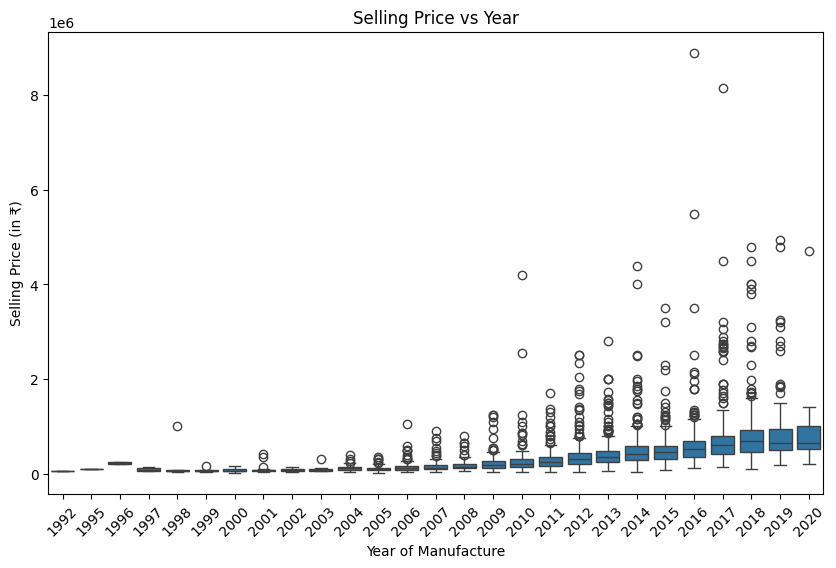

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Selling Price vs Year")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (in ₹)")
plt.show()

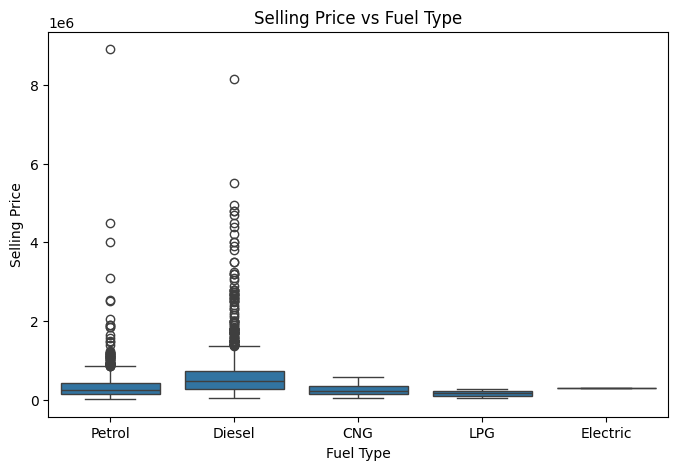

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title("Selling Price vs Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

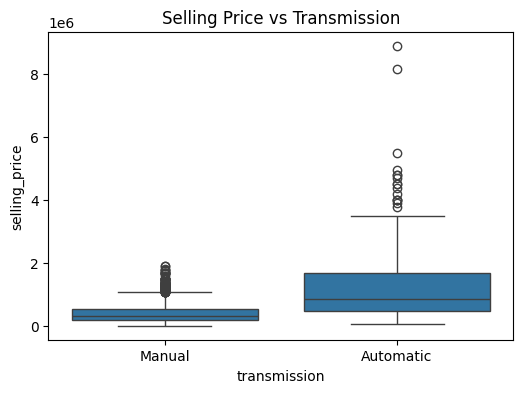

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title("Selling Price vs Transmission")
plt.show()

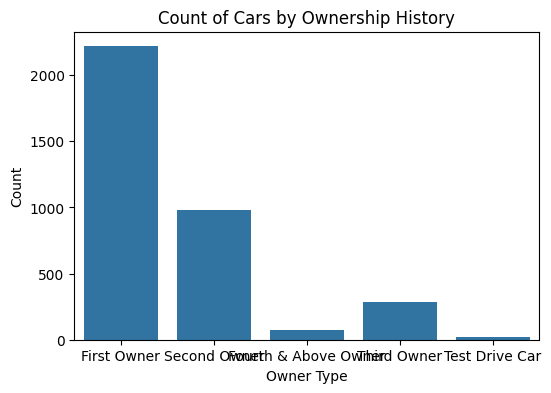

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='owner', data=df)
plt.title("Count of Cars by Ownership History")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()

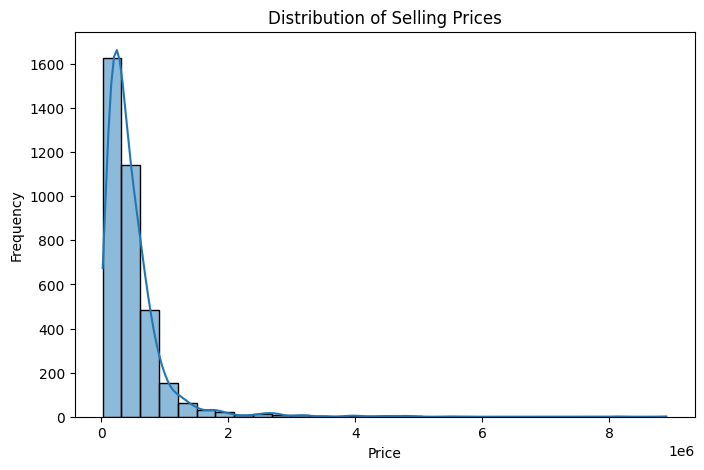

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

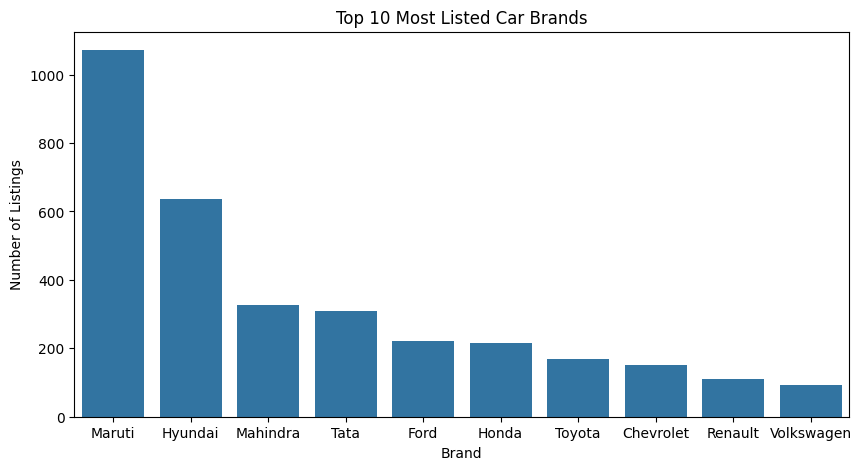

In [15]:
# Extract the first word from 'name' column (usually brand)
df['brand'] = df['name'].apply(lambda x: x.split()[0])

# Count top 10 brands
top_brands = df['brand'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Most Listed Car Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Listings")
plt.show()

In [16]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])
df.drop(columns=['name'], inplace=True)

In [17]:
df['selling_price_log'] = np.log1p(df['selling_price'])

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
# Features (excluding actual price and string versions)
X = df.drop(columns=['selling_price', 'selling_price_log'])

# Target: log-transformed price
y = df['selling_price_log']

In [20]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((2861, 7), (716, 7))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Choose models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

results = []

for name, model in models.items():
    model.fit(X_train, y_train)                    # Train
    y_pred = model.predict(X_test)                 # Predict on test
    mae = mean_absolute_error(y_test, y_pred)      # Error Avg
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Big error punisher

    results.append((name, mae, rmse))

# Show results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE"])
results_df.sort_values("RMSE")

,Model,MAE,RMSE
2,Gradient Boosting,0.301536,0.390813
1,Random Forest,0.317475,0.422942
0,Linear Regression,0.363371,0.473654


In [24]:
from sklearn.model_selection import cross_val_score

print("\nCross-Validation Results (5-Fold RMSE):\n")

for name, model in models.items():
    # Negative RMSE (sklearn uses "negative" for scoring so we multiply by -1)
    cv_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    avg_rmse = -1 * cv_scores.mean()

    print(f"{name}: Avg CV RMSE = {avg_rmse:.2f}")


Cross-Validation Results (5-Fold RMSE):

Linear Regression: Avg CV RMSE = 0.48
Random Forest: Avg CV RMSE = 0.42
Gradient Boosting: Avg CV RMSE = 0.39
